<a href="https://colab.research.google.com/github/RavishGarg01/DiseasePredictionSystem/blob/main/DPS_ml_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing libraries
import numpy as np
import pandas as pd
from scipy.stats import mode
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

%matplotlib inline


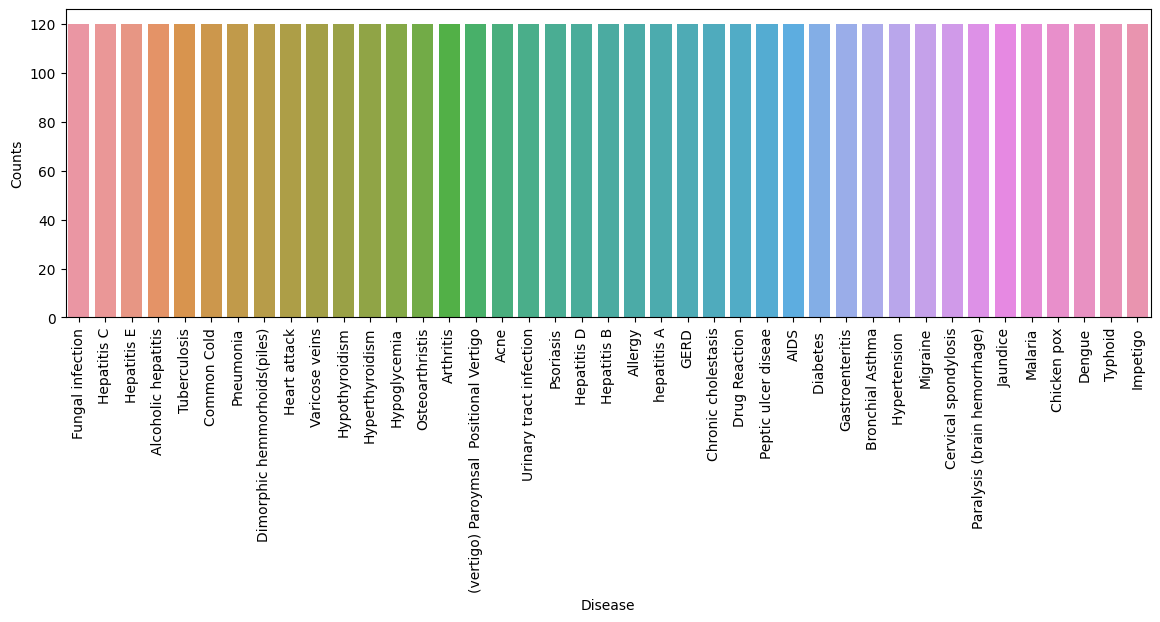

In [ ]:
# Reading the train.csv by removing the
# last column since it's an empty column
DATA_PATH = "Training.csv"
data = pd.read_csv(DATA_PATH).dropna(axis = 1)

# Checking whether the dataset is balanced or not
disease_counts = data["prognosis"].value_counts()
temp_df = pd.DataFrame({
	"Disease": disease_counts.index,
	"Counts": disease_counts.values
})

plt.figure(figsize = (14,4))
sns.barplot(x = "Disease", y = "Counts", data = temp_df)
plt.xticks(rotation=90)
plt.show()


In [ ]:
# Encoding the target value into numerical
# value using LabelEncoder
encoder = LabelEncoder()
data["prognosis"] = encoder.fit_transform(data["prognosis"])


In [ ]:
X = data.iloc[:,:-1]
y = data.iloc[:, -1]
X_train, X_test, y_train, y_test =train_test_split(
X, y, test_size = 0.2, random_state = 24)

print(f"Train: {X_train.shape}, {y_train.shape}")
print(f"Test: {X_test.shape}, {y_test.shape}")




Train: (3936, 132), (3936,)
Test: (984, 132), (984,)


In [ ]:
# Defining scoring metric for k-fold cross validation
def cv_scoring(estimator, X, y):
	return accuracy_score(y, estimator.predict(X))

# Initializing Models
models = {
	"SVC":SVC(),
	"Gaussian NB":GaussianNB(),
	"Random Forest":RandomForestClassifier(random_state=18)
}

# Producing cross validation score for the models
for model_name in models:
	model = models[model_name]
	scores = cross_val_score(model, X, y, cv = 10,
							n_jobs = -1,
							scoring = cv_scoring)
	print("=="*30)
	print(model_name)
	print(f"Scores: {scores}")
	print(f"Mean Score: {np.mean(scores)}")


SVC
Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean Score: 1.0
Gaussian NB
Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean Score: 1.0
Random Forest
Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean Score: 1.0
